In [2]:
from sentence_transformers import SentenceTransformer
from transformers import BertTokenizer, BertModel
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import decomposition
import plotly.express as px
import pandas as pd
import numpy as np
import torch

In [2]:
# model = SentenceTransformer('bert-base-nli-mean-tokens'),
# embedder = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-large-cased')
model = BertModel.from_pretrained('bert-large-cased')

In [ ]:
def get_bert_embeddings(sentence):
    input_ids = torch.tensor(tokenizer.encode(sentence)).unsqueeze(0)  # Batch size 1
    outputs = model(input_ids)
    last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple
    print(last_hidden_states.size())
    mean = torch.mean(last_hidden_states[0], axis=1)
    return mean[0].tolist()

In [3]:
# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'A man is eating pasta.',
          'The girl is carrying a baby.',
          'The baby is carried by the woman',
          'A man is riding a horse.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.',
          'A cheetah is running behind its prey.',
          'A cheetah chases prey on across a field.']

corpus_embeddings = [get_bert_embeddings(sent) for sent in corpus[0:1]]

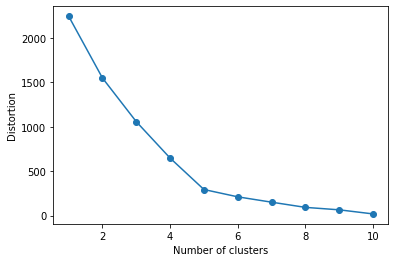

In [4]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(corpus_embeddings)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [5]:
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [6]:
print(cluster_assignment)

[1 1 1 2 2 4 4 3 3 0 0]


In [44]:
pca = decomposition.PCA(n_components=3)
pca.fit(corpus_embeddings)
3d_corpus_embeddings = pca.transform(corpus_embeddings)

In [ ]:
df = pd.DataFrame(3d_corpus_embeddings, columns=['x', 'y', 'z'])
df['cluster'] = cluster_assignment
df['text'] = corpus

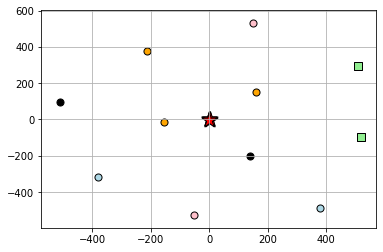

In [50]:
fig = px.scatter_3d(df, x='x', y='y', z='z',
              color='cluster')
fig.show()